# Machine Failure detection

UDI (Unique Device Identifier): A unique identifier for each device or machine in the dataset.

ProductID: An identifier for the product associated with the machine or process.

Type: The type or category of the machine or process.

Air_temperature: The air temperature in the environment where the machine operates.

Process_temperature: The temperature of the machine's processes or components.

Rotational_speed: The rotational speed of the machine's moving parts, such as a motor or rotor.

Torque: The torque or rotational force applied by the machine.

Tool_wear_in_min: The amount of tool wear in minutes. This could be an important indicator for maintenance.

Machine_failure: A binary variable indicating whether a machine failure occurred (1) or not (0). This is the target variable you likely want to predict.

TWF (Tool Wear Failure): A binary variable indicating whether a tool wear failure occurred (1) or not (0). This could be a specific type of machine failure.

HDF (Heat Dissipation Failure): A binary variable indicating whether a heat dissipation failure occurred (1) or not (0). Another type of machine failure.

PWF (Power Failure): A binary variable indicating whether a power failure occurred (1) or not (0). Yet another type of machine failure.

OSF (Overheating Failure): A binary variable indicating whether an overheating failure occurred (1) or not (0). Another potential failure type.

RNF (Random Failure): A binary variable indicating whether a random failure occurred (1) or not (0). This could represent unpredictable failures.

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

In [87]:
df = pd.read_csv('ai4i2020.csv')

In [88]:
df.head()

,UDI,ProductID,Type,Air_temperature,Process_temperature,Rotational_speed,Torque,Tool_wear_in_min,Machine_failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


# Handling Missing Values:

In [89]:
df.isnull().sum()

UDI                    0
ProductID              0
Type                   0
Air_temperature        0
Process_temperature    0
Rotational_speed       0
Torque                 0
Tool_wear_in_min       0
Machine_failure        0
TWF                    0
HDF                    0
PWF                    0
OSF                    0
RNF                    0
dtype: int64

There isn't any missing values

# Box plots

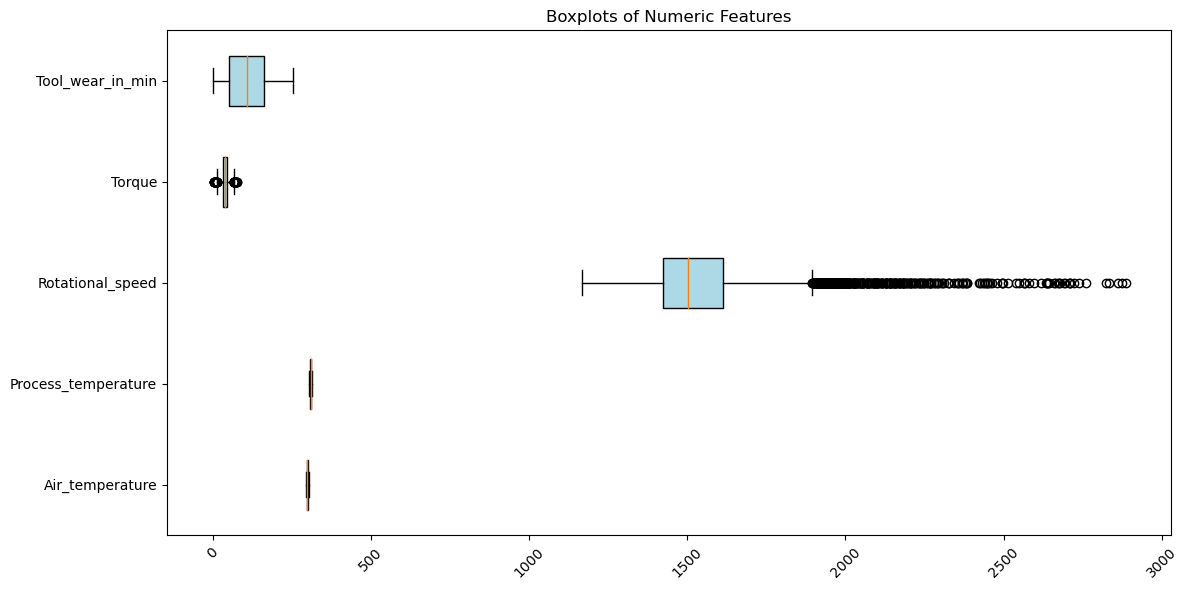

In [90]:
# Select only the numeric columns for box plot visualization
numeric_features = df[['Air_temperature', 'Process_temperature', 'Rotational_speed', 'Torque', 'Tool_wear_in_min']]

# Create box plots for each numeric feature
plt.figure(figsize=(12, 6))
plt.title("Boxplots of Numeric Features")
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

# Use the 'boxplot' function to create the box plots
boxplot = plt.boxplot(numeric_features.values, vert=False, patch_artist=True)

# Add labels to the box plots
for patch in boxplot['boxes']:
    patch.set(facecolor='lightblue')  # Customize the box color here

# Add feature names to the y-axis
plt.yticks(range(1, len(numeric_features.columns) + 1), numeric_features.columns)
plt.tight_layout()

# Show the box plots
plt.show()


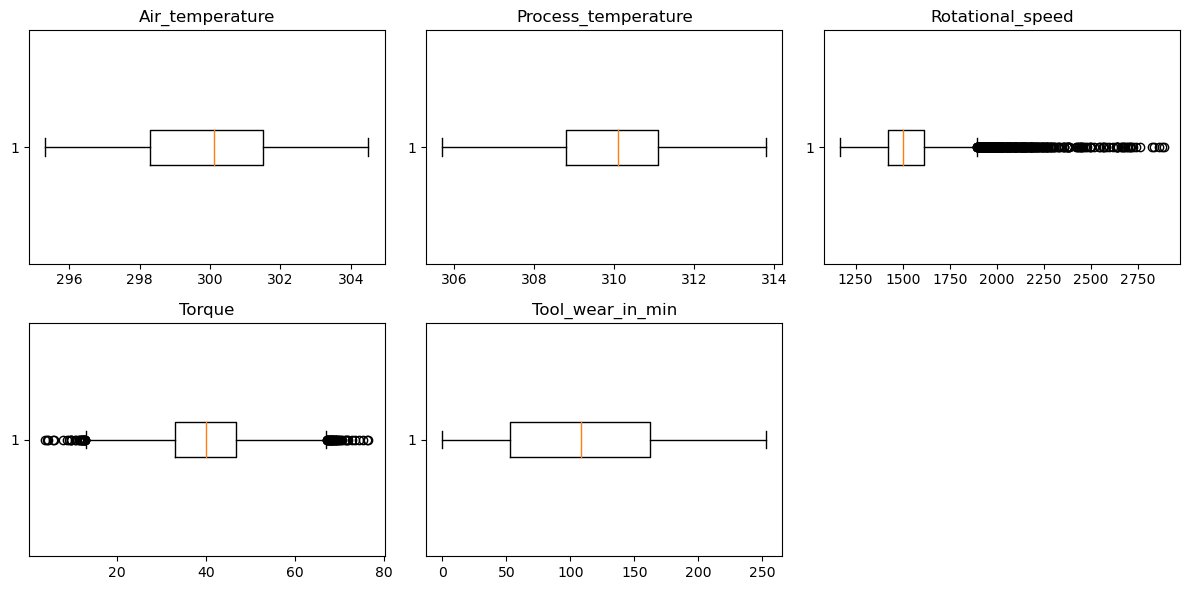

In [91]:
# Select the numerical columns for which you want to create box plots
numerical_columns = ['Air_temperature', 'Process_temperature', 'Rotational_speed', 'Torque', 'Tool_wear_in_min']

# Create subplots for each feature
plt.figure(figsize=(12, 6))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    plt.boxplot(df[column], vert=False)
    plt.title(column)

plt.tight_layout()
plt.show()

Outliers in Rotational_speed and Torque suggest that there are extreme values in these features, which may be important or indicative of certain conditions or events.
The presence of outliers doesn't necessarily mean you should remove them, especially if they hold valuable information about machine behavior or anomalies.

In [92]:
df.describe()

,UDI,Air_temperature,Process_temperature,Rotational_speed,Torque,Tool_wear_in_min,Machine_failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


Plot histograms for numerical features

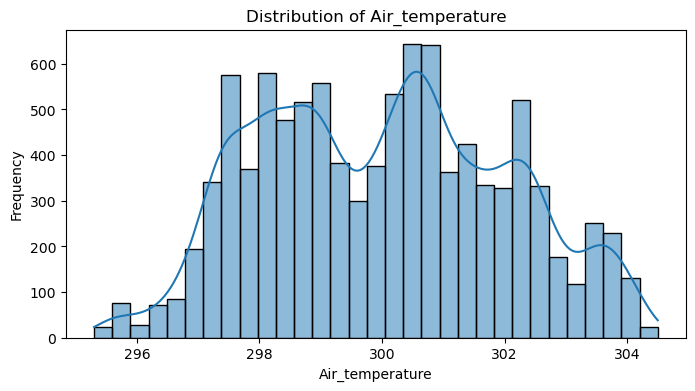

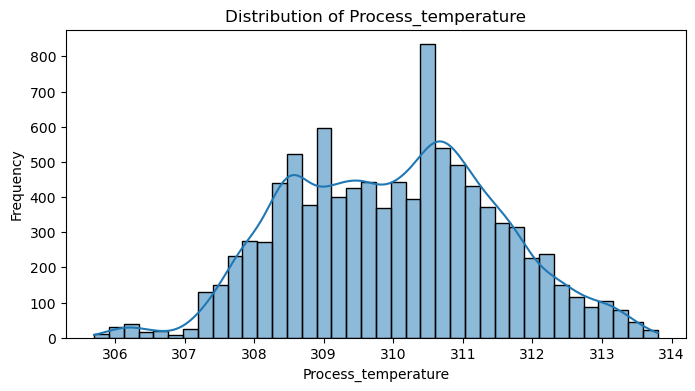

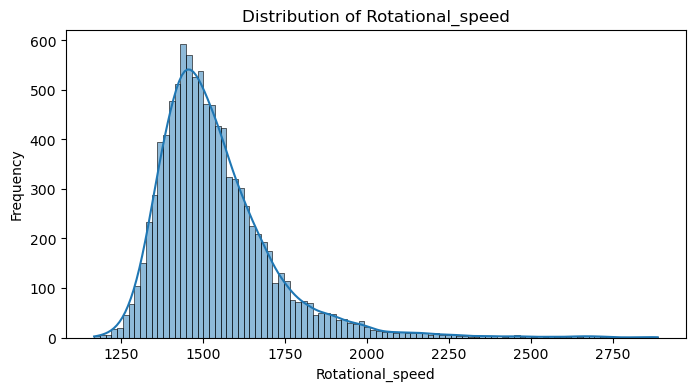

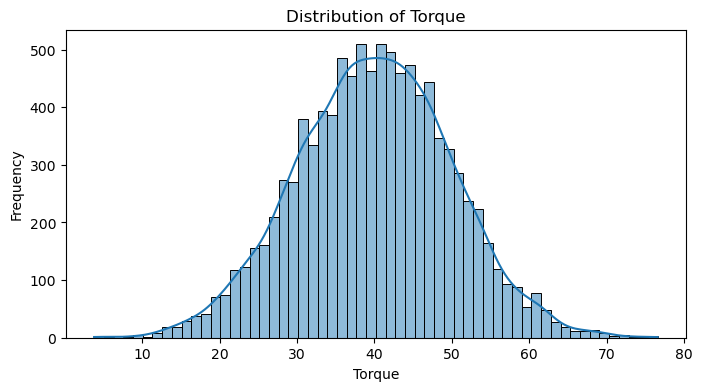

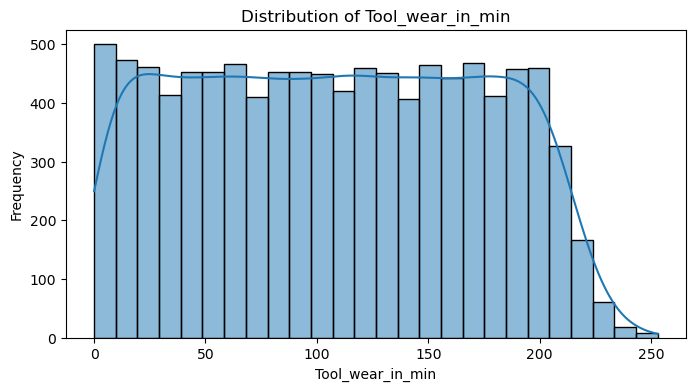

In [93]:
for column in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


Correlation Analysis:

Explore the relationships between numerical features by calculating and visualizing correlation matrices

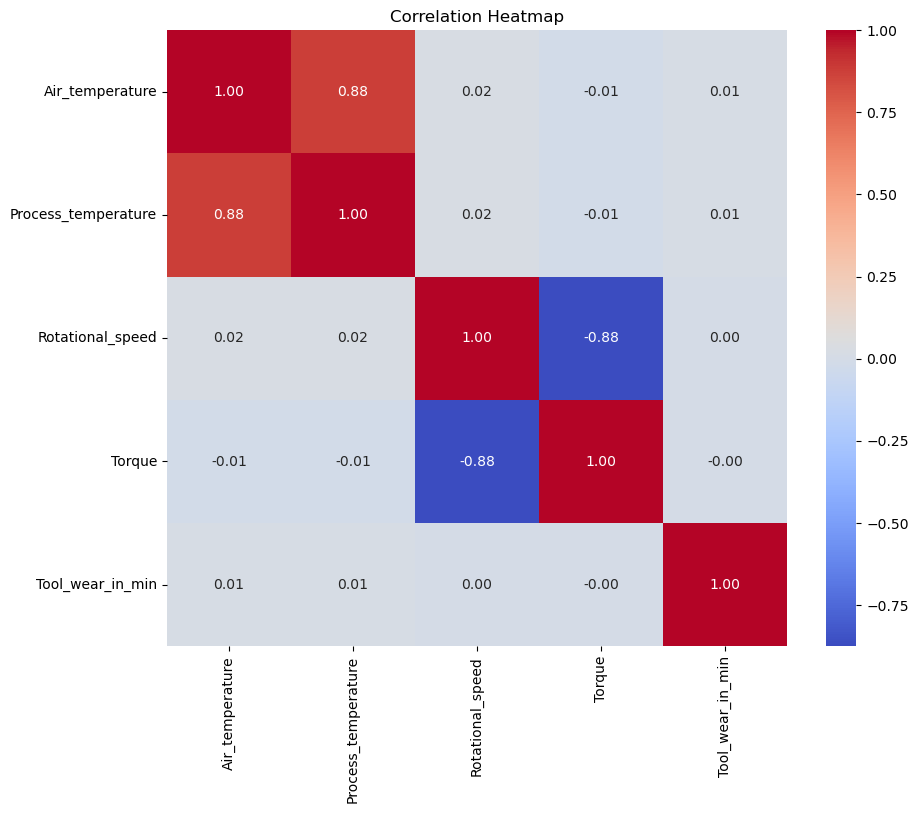

In [94]:
# Calculate the correlation matrix
correlation_matrix = df[numerical_columns].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

Categorical Features:

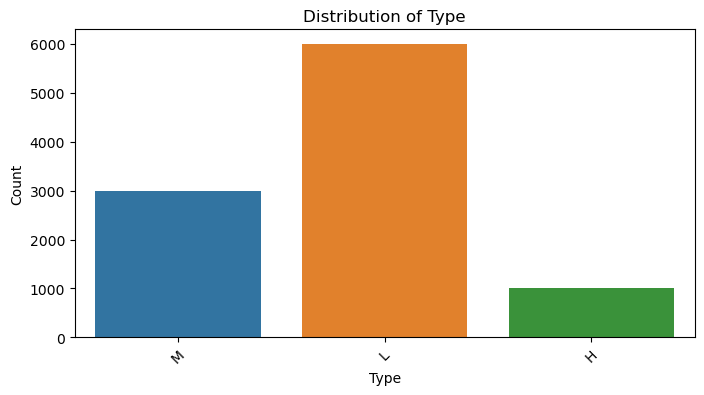

In [95]:
# Plot a bar plot for the 'Type' feature
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Type')
plt.title('Distribution of Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Data Imbalance

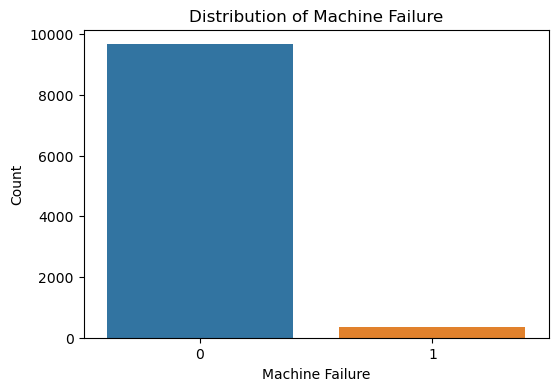

In [96]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Machine_failure')
plt.title('Distribution of Machine Failure')
plt.xlabel('Machine Failure')
plt.ylabel('Count')
plt.show()

In [97]:
df.dtypes

UDI                      int64
ProductID               object
Type                    object
Air_temperature        float64
Process_temperature    float64
Rotational_speed         int64
Torque                 float64
Tool_wear_in_min         int64
Machine_failure          int64
TWF                      int64
HDF                      int64
PWF                      int64
OSF                      int64
RNF                      int64
dtype: object

UDI and ProductID we don't need them, so we can drop them

# Droping UDI and ProductID

In [98]:
df = df.drop(['UDI', 'ProductID'], axis=1)

In [99]:
df.head()

,Type,Air_temperature,Process_temperature,Rotational_speed,Torque,Tool_wear_in_min,Machine_failure,TWF,HDF,PWF,OSF,RNF
0,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


# Encode type using Label encoder

In [100]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'Type' is the name of the column you want to encode
label_encoder = LabelEncoder()
df['Type'] = label_encoder.fit_transform(df['Type'])

In [101]:
df.head()

,Type,Air_temperature,Process_temperature,Rotational_speed,Torque,Tool_wear_in_min,Machine_failure,TWF,HDF,PWF,OSF,RNF
0,2,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,1,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,1,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,1,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,1,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [102]:
X = df.drop('Machine_failure', axis = 1)
X

,Type,Air_temperature,Process_temperature,Rotational_speed,Torque,Tool_wear_in_min,TWF,HDF,PWF,OSF,RNF
0,2,298.1,308.6,1551,42.8,0,0,0,0,0,0
1,1,298.2,308.7,1408,46.3,3,0,0,0,0,0
2,1,298.1,308.5,1498,49.4,5,0,0,0,0,0
3,1,298.2,308.6,1433,39.5,7,0,0,0,0,0
4,1,298.2,308.7,1408,40.0,9,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,2,298.8,308.4,1604,29.5,14,0,0,0,0,0
9996,0,298.9,308.4,1632,31.8,17,0,0,0,0,0
9997,2,299.0,308.6,1645,33.4,22,0,0,0,0,0
9998,0,299.0,308.7,1408,48.5,25,0,0,0,0,0


In [103]:
y = df.Machine_failure
y

0       0
1       0
2       0
3       0
4       0
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: Machine_failure, Length: 10000, dtype: int64

In [104]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest classifier
clf = RandomForestClassifier()
clf.fit(X, y)

# Get feature importances
feature_importances = clf.feature_importances_

In [105]:
feature_importances

array([3.89356937e-03, 1.56366121e-02, 1.24493439e-02, 3.94605999e-02,
       8.05913273e-02, 2.86667897e-02, 1.16235834e-01, 2.92462918e-01,
       1.88602169e-01, 2.21861764e-01, 1.39073033e-04])

In [106]:
# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)  # 70% training

# Further split the remaining data into validation and test sets (equal split)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

Standardization scales the features to have a mean of 0 and a standard deviation of 1.

In [107]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on your training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform your validation and test data using the same scaler
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

Build the Neural Network Model:

Define the architecture of your neural network using Keras.

In [108]:
# Calculate class weights
total_samples = len(y_train)
num_minority_samples = sum(y_train == 1)  # Assuming the minority class is labeled as 1
num_majority_samples = total_samples - num_minority_samples

class_weight = {
    0: 1.0,  # Weight for the majority class (assuming it's labeled as 0)
    1: num_majority_samples / num_minority_samples  # Weight for the minority class
}

In [109]:
class_weight[1]

27.571428571428573

In [110]:
input_dim = len(df.columns) - 1

model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(input_dim,), name='input_layer'),
    keras.layers.Dropout(0.2),  # Optional: Dropout layer for regularization
    keras.layers.Dense(64, activation='relu', name='hidden_layer1'),
    keras.layers.Dense(64, activation='relu', name='hidden_layer2'),
    keras.layers.Dense(1, activation='sigmoid', name='output_layer')
])

Compile the Model:

Compile the model by specifying the loss function, optimizer, and evaluation metrics

In [111]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy',  # Use appropriate loss function for your problem
              metrics=['accuracy'])

Train the Model:

In [121]:
history = model.fit(X_train, y_train, 
                    epochs=150, 
                    batch_size=128, 
                    validation_data=(X_val, y_val),
                    class_weight=class_weight
)


Epoch 1/100
47/47 [==============================] - 0s 7ms/step - loss: 0.6015 - accuracy: 0.8555 - val_loss: 0.1680 - val_accuracy: 0.9370
Epoch 2/100
47/47 [==============================] - 0s 6ms/step - loss: 0.5142 - accuracy: 0.8812 - val_loss: 0.3240 - val_accuracy: 0.8490
Epoch 3/100
47/47 [==============================] - 0s 7ms/step - loss: 0.5105 - accuracy: 0.8805 - val_loss: 0.3020 - val_accuracy: 0.8505
Epoch 4/100
47/47 [==============================] - 0s 6ms/step - loss: 0.5130 - accuracy: 0.8818 - val_loss: 0.2281 - val_accuracy: 0.8890
Epoch 5/100
47/47 [==============================] - 0s 5ms/step - loss: 0.5489 - accuracy: 0.8643 - val_loss: 0.2938 - val_accuracy: 0.8515
Epoch 6/100
47/47 [==============================] - 0s 6ms/step - loss: 0.5292 - accuracy: 0.8710 - val_loss: 0.2318 - val_accuracy: 0.8945
Epoch 7/100
47/47 [==============================] - 0s 7ms/step - loss: 0.5458 - accuracy: 0.8738 - val_loss: 0.2202 - val_accuracy: 0.9060
Epoch 8/100
4

In [83]:
#Load up all the common functions. Required to execute other experiments
#Please reload if changes are made to the functions
%run Common_Experiment_Functions.ipynb

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
  Using cached sklearn-0.0.post9.tar.gz (3.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for sklearn: filename=sklearn-0.0.post9-py3-none-any.whl size=2951 sha256=fe1fe17218ec1a7e2e6799592c5ac99883531b358038403b324b9b67e0847323
  Stored in directory: c:\users\hazem\appdata\local\pip\cache\wheels\e2\4f\96\3b01e8981cb6f333764a2443a1f4777896180da6e46efe95c1
Successfully built sklearn
Defaulting to user installation because normal site-packages is not writeable


In [122]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

63/63 [==============================] - 0s 2ms/step - loss: 0.2767 - accuracy: 0.8910
Test Accuracy: 89.10%
